In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from skbio.diversity import alpha_diversity
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
otu_df = pd.read_csv('../QIIME2/exported-table-taxonomy/table.from_biom_w_taxonomy.txt', skiprows=1, sep = '\t', index_col=0)
# otu_df.drop('taxonomy', axis = 1, inplace = True)
otu_df = otu_df.T
otu_df = otu_df[otu_df.index.str.contains('L')]
low_reads_df = pd.DataFrame(otu_df.sum(axis = 1))
low_reads = low_reads_df[low_reads_df[0] < 1000].index
otu_df = otu_df[~otu_df.index.isin(low_reads)]
print(len(low_reads))
print(low_reads)
print(otu_df.shape)
otu_df

4
Index(['L92', 'LB3', 'LB5', 'LB9'], dtype='object')
(152, 65)


#OTU ID,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G17,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;__,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Yamato09 A2,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo45,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;s__Alguacil12a Para 1,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Whitfield type 17,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__GCL-6,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G8,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;__,k__fungi;p__Glomeromycota;c__Glomeromycetes;__;__;__;__,...,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo3,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;s__IS-Pg1,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo-D,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G27,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__acnaGlo2,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__cf. microaggregatum,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Claroideoglomeraceae;g__Claroideoglomus;s__Glo59,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G14,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__INTA-4,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__ORVIN GLO3B
L1,5556.0,515.0,457.0,519.0,0.0,33.0,0.0,153.0,57.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L10,2649.0,524.0,0.0,0.0,61.0,170.0,0.0,0.0,270.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L100,9868.0,161.0,51.0,186.0,7.0,0.0,0.0,50.0,249.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L101,482.0,8626.0,364.0,189.0,3554.0,0.0,268.0,620.0,574.0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L102,9102.0,1029.0,5.0,114.0,0.0,28.0,0.0,523.0,57.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LB2,0.0,602.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LB4,863.0,2224.0,0.0,962.0,0.0,0.0,0.0,731.0,565.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LB6,0.0,2732.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LB7,0.0,418.0,1038.0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
mapping_file = pd.read_csv('../QIIME2.2/mapping_file/mapping_file.csv', index_col=0)
mapping_file = mapping_file[mapping_file.index.isin(otu_df.index)]
print(mapping_file.shape)
mapping_file

(141, 42)


,genotype_1,fertility_1,amf,rep_1,group_1,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,root_colonization,...,G_5,FERT_5,AMF,REP_5,group_5,Length,AvgDiam,Forks,SurfArea,Origin
#SampleID,,,,,,,,,,,,,,,,,,,,,
L1,1,P,Y,1,Common (C. dactylon),29.961,4.46,34.421,0.129572,43,...,1,P,Y,1,Common (C. dactylon),162.8464,0.2905,904.0,14.8643,African
L10,1,PPP,Y,2,Common (C. dactylon),26.283,10.16,36.443,0.278792,36,...,1,PPP,Y,2,Common (C. dactylon),329.7942,0.2978,2620.0,30.8595,African
L100,9,PP,Y,5,Common (C. dactylon),18.142,6.82,24.962,0.273215,21,...,9,PP,Y,5,Common (C. dactylon),229.4975,0.3495,1577.0,25.1969,Asian
L101,9,PP,Y,1,Common (C. dactylon),25.649,10.88,36.529,0.297846,26,...,9,PP,Y,1,Common (C. dactylon),216.1839,0.3708,1395.0,25.1835,Asian
L102,9,PP,Y,2,Common (C. dactylon),25.664,12.66,38.324,0.330341,39,...,9,PP,Y,2,Common (C. dactylon),302.0509,0.2743,1827.0,26.0297,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L95,8,PPP,Y,4,Hybrid (C. transvaalensis),22.510,8.57,31.080,0.275740,40,...,8,PPP,Y,4,Hybrid (C. transvaalensis),106.4580,0.3194,150.0,10.6812,African
L96,9,P,Y,5,Common (C. dactylon),18.365,8.69,27.055,0.321198,31,...,9,P,Y,5,Common (C. dactylon),357.6942,0.2741,2434.0,30.8066,Asian
L97,9,P,Y,1,Common (C. dactylon),20.526,5.16,25.686,0.200888,36,...,9,P,Y,1,Common (C. dactylon),213.3945,0.3306,1244.0,22.1649,Asian


In [4]:
otu_df = otu_df[otu_df.index.isin(mapping_file.index)]

In [5]:
observed_otus = alpha_diversity('observed_otus', otu_df, otu_df.index)
shannon = alpha_diversity('shannon', otu_df, otu_df.index)

In [6]:
mapping_file['observed otus'] = observed_otus.values
mapping_file['shannon'] = shannon.values
mapping_file.head()

,genotype_1,fertility_1,amf,rep_1,group_1,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,root_colonization,...,AMF,REP_5,group_5,Length,AvgDiam,Forks,SurfArea,Origin,observed otus,shannon
#SampleID,,,,,,,,,,,,,,,,,,,,,
L1,1,P,Y,1,Common (C. dactylon),29.961,4.46,34.421,0.129572,43,...,Y,1,Common (C. dactylon),162.8464,0.2905,904.0,14.8643,African,17,1.732985
L10,1,PPP,Y,2,Common (C. dactylon),26.283,10.16,36.443,0.278792,36,...,Y,2,Common (C. dactylon),329.7942,0.2978,2620.0,30.8595,African,14,2.045085
L100,9,PP,Y,5,Common (C. dactylon),18.142,6.82,24.962,0.273215,21,...,Y,5,Common (C. dactylon),229.4975,0.3495,1577.0,25.1969,Asian,13,0.719401
L101,9,PP,Y,1,Common (C. dactylon),25.649,10.88,36.529,0.297846,26,...,Y,1,Common (C. dactylon),216.1839,0.3708,1395.0,25.1835,Asian,26,2.573302
L102,9,PP,Y,2,Common (C. dactylon),25.664,12.66,38.324,0.330341,39,...,Y,2,Common (C. dactylon),302.0509,0.2743,1827.0,26.0297,Asian,17,1.528198


In [7]:
print(mapping_file['observed otus'].mean())
print(mapping_file['observed otus'].std())

19.04255319148936
5.136525146196366


In [8]:
model = ols('shannon ~ C(genotype_1)', data=mapping_file).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(genotype_1),4.652057,11.0,0.904046,0.53857
Residual,60.346419,129.0,NaN,NaN


In [9]:
model = ols('shannon ~ C(genotype_1)', data=mapping_file).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(genotype_1),4.652057,11.0,0.904046,0.53857
Residual,60.346419,129.0,NaN,NaN


In [10]:
model = ols('observed_otus ~ C(Origin)', data=mapping_file).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Origin),265.743854,1.0,10.775492,0.001301
Residual,3428.000827,139.0,NaN,NaN


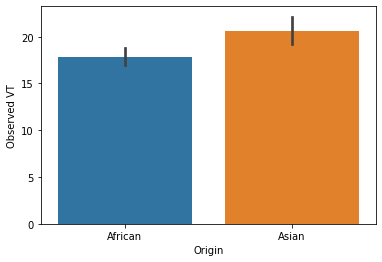

In [31]:
sns.barplot(x = 'Origin', y = 'observed otus', data = mapping_file)
plt.ylabel('Observed VT')
plt.xlabel('Origin')
plt.savefig('../Figures/richness_origin.jpg', bbox_inches = 'tight', dpi = 300)

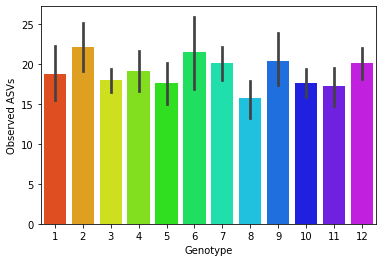

In [12]:
sns.barplot(x = 'genotype_1', y = 'observed otus', data = mapping_file, palette = 'gist_rainbow')
plt.ylabel('Observed ASVs')
plt.xlabel('Genotype')
plt.savefig('../Figures/richness_genotype.jpg', bbox_inches = 'tight', dpi = 300)

<AxesSubplot:xlabel='genotype_1', ylabel='shannon'>

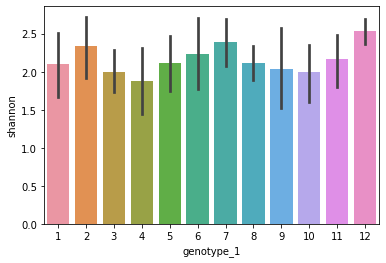

In [13]:
sns.barplot(x = 'genotype_1', y = 'shannon', data = mapping_file)

<AxesSubplot:xlabel='fertility_1', ylabel='shannon'>

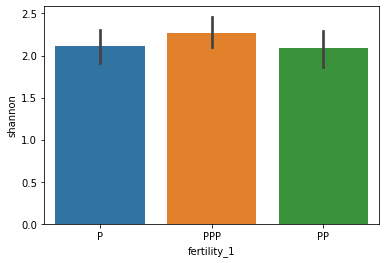

In [14]:
sns.barplot(x = 'fertility_1', y = 'shannon', data = mapping_file)

In [15]:
otu_df.head()

#OTU ID,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G17,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;__,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Yamato09 A2,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo45,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;s__Alguacil12a Para 1,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Whitfield type 17,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__GCL-6,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G8,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;__,k__fungi;p__Glomeromycota;c__Glomeromycetes;__;__;__;__,...,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo3,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;s__IS-Pg1,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo-D,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G27,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__acnaGlo2,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__cf. microaggregatum,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Claroideoglomeraceae;g__Claroideoglomus;s__Glo59,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G14,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__INTA-4,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__ORVIN GLO3B
L1,5556.0,515.0,457.0,519.0,0.0,33.0,0.0,153.0,57.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L10,2649.0,524.0,0.0,0.0,61.0,170.0,0.0,0.0,270.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L100,9868.0,161.0,51.0,186.0,7.0,0.0,0.0,50.0,249.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L101,482.0,8626.0,364.0,189.0,3554.0,0.0,268.0,620.0,574.0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L102,9102.0,1029.0,5.0,114.0,0.0,28.0,0.0,523.0,57.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
mapping_file.head()

,genotype_1,fertility_1,amf,rep_1,group_1,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,root_colonization,...,AMF,REP_5,group_5,Length,AvgDiam,Forks,SurfArea,Origin,observed otus,shannon
#SampleID,,,,,,,,,,,,,,,,,,,,,
L1,1,P,Y,1,Common (C. dactylon),29.961,4.46,34.421,0.129572,43,...,Y,1,Common (C. dactylon),162.8464,0.2905,904.0,14.8643,African,17,1.732985
L10,1,PPP,Y,2,Common (C. dactylon),26.283,10.16,36.443,0.278792,36,...,Y,2,Common (C. dactylon),329.7942,0.2978,2620.0,30.8595,African,14,2.045085
L100,9,PP,Y,5,Common (C. dactylon),18.142,6.82,24.962,0.273215,21,...,Y,5,Common (C. dactylon),229.4975,0.3495,1577.0,25.1969,Asian,13,0.719401
L101,9,PP,Y,1,Common (C. dactylon),25.649,10.88,36.529,0.297846,26,...,Y,1,Common (C. dactylon),216.1839,0.3708,1395.0,25.1835,Asian,26,2.573302
L102,9,PP,Y,2,Common (C. dactylon),25.664,12.66,38.324,0.330341,39,...,Y,2,Common (C. dactylon),302.0509,0.2743,1827.0,26.0297,Asian,17,1.528198


In [17]:
otu_taxa = otu_df.copy()
otu_taxa.columns = [x.split('g__')[1].split(';')[0] if 'g__' in x else 'Unclassified' for x in otu_df.columns]
otu_taxa = otu_taxa.T
otu_taxa['Genus'] = otu_taxa.index
otu_taxa = otu_taxa.groupby('Genus').sum().T
otu_taxa = otu_taxa[otu_taxa.index.isin(mapping_file.index)]
otu_taxa_geno = pd.concat([otu_taxa, mapping_file['genotype_1']], axis=1, join="inner")
otu_taxa_geno_melt = otu_taxa_geno.melt('genotype_1')
otu_taxa_geno_melt.rename(columns= {'genotype_1':'Genotype','variable':'Genus','value':'Abundance'}, inplace = True)
otu_taxa_geno_melt.head()

,Genotype,Genus,Abundance
0,1,Acaulospora,38.0
1,1,Acaulospora,73.0
2,9,Acaulospora,242.0
3,9,Acaulospora,23.0
4,9,Acaulospora,13.0


In [18]:
df_index = otu_taxa_geno_melt.groupby('Genotype', sort=False).sum().index
df_columns = otu_taxa.columns
genus_table = pd.DataFrame(index = df_index, columns = df_columns)
genus_table.head()

Genus,Acaulospora,Archaeospora,Claroideoglomus,Diversispora,Glomus,Paraglomus,Scutellospora,Unclassified
Genotype,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for i in df_index:
#     print(i)
    for j in df_columns:
        if j in otu_taxa_geno_melt[otu_taxa_geno_melt['Genotype'] == i]['Genus'].values:
#             print(minimap_otu_table_phyla[(minimap_otu_table_phyla['Site'] == i) & (minimap_otu_table_phyla['Phyla'] == j)]['Abundance'].values)
            genus_table.loc[i,j] = otu_taxa_geno_melt[(otu_taxa_geno_melt['Genotype'] == i) & (otu_taxa_geno_melt['Genus'] == j)]['Abundance'].values[0]
        else:
            otu_taxa_geno_melt.loc[i,j] = 0
# minimap_otu_table_phyla_reshaped.to_csv(file_path + method + '_otu_table_phyla_reshaped.csv')
genus_table_perc = genus_table.div(genus_table.sum(axis=1), axis=0)*100
genus_table_perc

Genus,Acaulospora,Archaeospora,Claroideoglomus,Diversispora,Glomus,Paraglomus,Scutellospora,Unclassified
Genotype,,,,,,,,
1,0.485809,0,0.536947,0.0894912,97.8139,1.04833,0,0.0255689
9,2.21937,0,0,0,95.1394,2.42113,0,0.220103
10,0.980469,0,0.644085,0.482412,91.6047,5.1957,0,1.0926
11,0.116618,0,15.792,0,77.5802,4.42177,0,2.08941
2,0,0,1.46699,0,98.3496,0.183374,0,0
12,0.883593,0.0972763,1.21595,0.0486381,95.1767,1.96984,0,0.607977
4,0,0,3.48361,0,95.8386,0.677806,0,0
3,0,0.634682,0.286631,0,81.3349,0.928138,0,16.8157
5,0,0,0,0,96.9236,2.1535,0,0.922927


In [22]:
genus_table_perc_final = genus_table_perc.copy()
genus_table_perc_final['Other'] = genus_table_perc_final['Unclassified']
for i in df_columns:
    if genus_table_perc_final[i].sum() < 5:
#         print('yes', i)
        genus_table_perc_final = genus_table_perc_final.rename(columns = {i:'Other'})
genus_table_perc_final = genus_table_perc_final.groupby(genus_table_perc_final.columns, axis=1).sum()
genus_table_perc_final.sort_index(inplace = True)
genus_table_perc_final = genus_table_perc_final[['Glomus', 'Acaulospora', 'Claroideoglomus', 'Paraglomus',
       'Other']]
genus_table_perc_final.head()

Genus,Glomus,Acaulospora,Claroideoglomus,Paraglomus,Other
Genotype,,,,,
1,97.813858,0.485809,0.536947,1.048325,0.115060
2,98.349633,0.000000,1.466993,0.183374,0.000000
3,81.334880,0.000000,0.286631,0.928138,17.450351
4,95.838588,0.000000,3.483607,0.677806,0.000000
5,96.923575,0.000000,0.000000,2.153497,0.922927


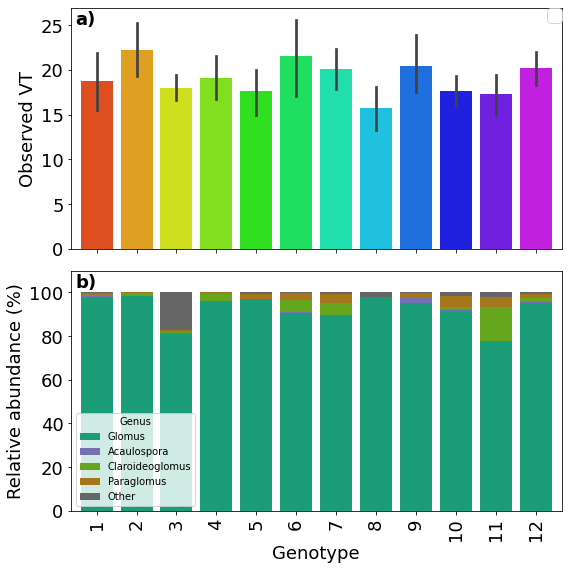

In [30]:
# minimap
fig, ax = plt.subplots(2,1, figsize=(8,8), sharex = True)

sns.barplot(x = 'genotype_1', y = 'observed otus', data = mapping_file, ax = ax[0], palette = 'gist_rainbow')
ax[0].set_ylabel('Observed VT', fontsize = 18)
ax[0].tick_params(axis='both', which='major', labelsize=18)

ax[1] = genus_table_perc_final.plot(kind='bar', stacked=True, cmap='Dark2', fontsize=18, width=0.8, ax = ax[1])
handles, labels = ax[0].get_legend_handles_labels()
ax[1].set_ylabel('Relative abundance (%)', fontsize = 18)
ax[1].set_xlabel('Genotype', fontsize = 18)
ax[1].set_ylim([0, 110])
fig.tight_layout()
fig.legend(handles[::-1], labels[::-1], fontsize = 18)

ax[0].annotate('a)',xy=(0.01, 0.99), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18, fontweight = 'bold')
ax[1].annotate('b)',xy=(0.01, 0.99), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18, fontweight = 'bold')
plt.savefig('../Figures/richness_taxa_genotype.jpg', dpi = 300, bbox_inches = 'tight')

In [31]:
genus_table_perc_final.describe()

Genus,Glomus,Acaulospora,Claroideoglomus,Paraglomus,Other
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,92.354001,0.419430,2.871739,2.184715,2.170115
std,6.709138,0.669248,4.542219,1.719674,4.868168
min,77.580175,0.000000,0.000000,0.000000,0.000000
25%,90.487337,0.000000,0.235855,0.865555,0.193842
50%,95.158058,0.058309,0.930019,2.061671,0.684405
75%,97.146146,0.585255,3.973596,3.389752,1.673136
max,98.349633,2.219369,15.792031,5.195703,17.450351


In [14]:
# alpha_div_df = pd.read_csv('../QIIME2.2/alpha_diversity/16S_alpha_stats.csv', index_col=0)
# alpha_div_df = alpha_div_df[alpha_div_df['Measure'] == 'Observed']
# alpha_div_df

In [15]:
# sns.barplot(x = 'genotype_1', y ='Mean', data = alpha_div_df)

In [17]:
# plt.errorbar(alpha_div_df['genotype_1'], alpha_div_df['Mean'], alpha_div_df['SE'], linestyle='None', marker='^')
# plt.ylim([0,70])